# Analysis of energy consumption and records from AB "Siauliu Energija"

## 1. Setup

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

register = pd.read_csv("register.csv")
rooms = pd.read_csv("rooms.csv")

## 2. Feature Engineering

Geometry data is in LKS94 format, which is relatively obscure and hard to work with, therefore we convert it to standard WGS84

In [34]:
from pyproj import Transformer

transformer = Transformer.from_crs('epsg:3346', 'epsg:4326', always_xy=True)
rooms['x_coord'], rooms['y_coord'] = transformer.transform(rooms['x_coord'].values, rooms['y_coord'].values)

In [35]:
register["month"] = pd.to_datetime(register["month"])
rooms["build_year"] = pd.to_datetime(rooms["build_year"])

start_date = pd.to_datetime('2019-01-01')
end_date = pd.to_datetime('2024-12-31')

register = register[(register["month"] >= start_date) & (register["month"] <= end_date)]

In [36]:
# Left join
joined_df = pd.merge(register, rooms, on="room_id", how="left")

## 3. Exploratory Data Analysis

In [5]:
monthly_result_sum = register.pivot_table(index='month', columns='service_category', values='amount', aggfunc='sum').reset_index()
#monthly_result_sum.to_csv("monthly_trend.csv")

Very little data is missing, which is very good

In [6]:
register.isna().sum(), rooms.isna().sum()

(room_id             403
 month                 0
 amount                0
 unit                  0
 buyer_id              0
 legal_entity          0
 service_name          0
 service_category      0
 dtype: int64,
 room_id               0
 building_id           0
 room_area          2388
 build_year            9
 building_floors       0
 building_type         0
 building_func         0
 x_coord               3
 y_coord               3
 dtype: int64)

In [24]:
joined_df.isna().sum()

room_id             1694983
month                     0
amount                    0
unit                      0
buyer_id                  0
legal_entity              0
service_name              0
service_category          0
building_id         1694985
room_area           1733843
build_year          1695167
building_floors     1694985
building_type       1694985
building_func       1694985
x_coord             1695103
y_coord             1695103
dtype: int64

In [28]:
register.dtypes, rooms.dtypes

(room_id                     object
 month               datetime64[ns]
 amount                     float64
 unit                        object
 buyer_id                    object
 legal_entity                  bool
 service_name                object
 service_category            object
 dtype: object,
 room_id                    object
 building_id                object
 room_area                 float64
 build_year         datetime64[ns]
 building_floors           float64
 building_type              object
 building_func              object
 x_coord                   float64
 y_coord                   float64
 dtype: object)

In [41]:
register.nunique(), rooms.nunique()

(room_id               44900
 month                    92
 amount              2059825
 unit                      5
 buyer_id              59795
 legal_entity              2
 service_name             12
 service_category          8
 dtype: int64,
 room_id            47734
 building_id         1421
 room_area           6918
 build_year           108
 building_floors       12
 building_type         40
 building_func         16
 x_coord             1416
 y_coord             1416
 dtype: int64)

In [14]:
# Energy consumption over time
reg_filt_heat = register[register["service_category"] == "Šiluma"]
reg_filt_heat = pd.DataFrame(reg_filt_heat.groupby("month")["amount"].sum())

# Energy consumption over time
reg_filt_wat = register[register["service_category"] == "Karštas vanduo"]
reg_filt_wat = pd.DataFrame(reg_filt_wat.groupby("month")["amount"].sum())

Text(0.5, 1.0, 'Heat over time')

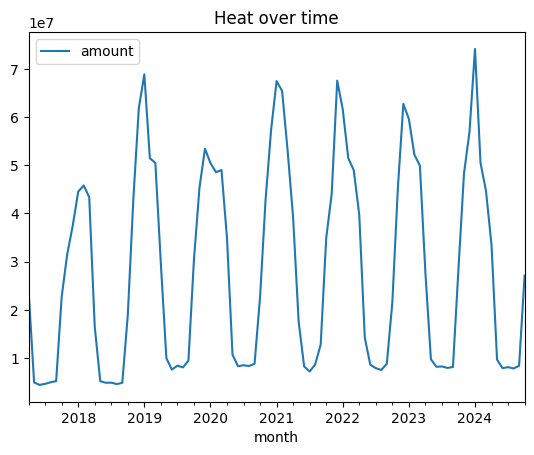

In [ ]:
reg_filt_heat.plot()
plt.title("Heat over time")

(0.0, 80000.0)

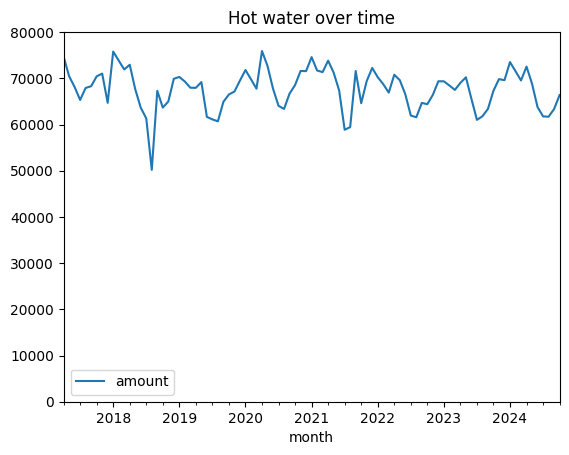

In [17]:
reg_filt_wat.plot()
plt.title("Hot water over time")
plt.ylim(0, 80000)

In [ ]:
new_register = register
new_register["year"] = new_register["month"].dt.year.astype(int)
yearly_result_sum = register.pivot_table(index='year', columns='service_category', values='amount', aggfunc='sum').reset_index()
#yearly_result_sum.to_csv("yearly_trend.csv")

In [19]:
reg_filt_heat = register[register["service_category"] == "Šiluma"]
reg_filt_heat["year"] = reg_filt_heat["month"].dt.year
reg_filt_heat = reg_filt_heat.groupby("year")["amount"].sum().reset_index()
reg_filt_heat.set_index("year", inplace=True)

reg_filt_wat = register[register["service_category"] == "Karštas vanduo"]
reg_filt_wat["year"] = reg_filt_wat["month"].dt.year
reg_filt_wat = reg_filt_wat.groupby("year")["amount"].sum().reset_index()
reg_filt_wat.set_index("year", inplace=True)

C:\Users\zygim\AppData\Local\Temp\ipykernel_6400\982236684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_filt_heat["year"] = reg_filt_heat["month"].dt.year
C:\Users\zygim\AppData\Local\Temp\ipykernel_6400\982236684.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_filt_wat["year"] = reg_filt_wat["month"].dt.year


Text(0.5, 1.0, 'heat consumption by year')

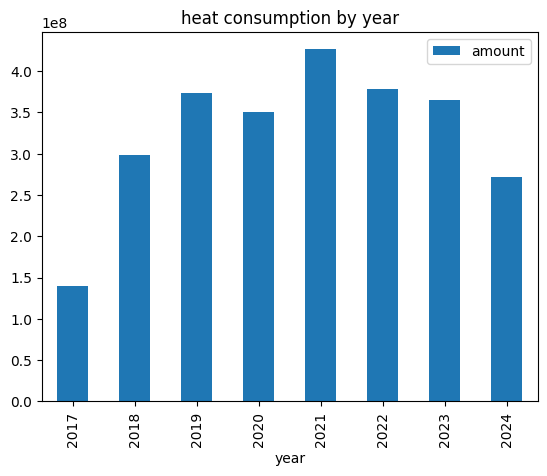

In [20]:
reg_filt_heat.plot(kind="bar")
plt.title("heat consumption by year")

Text(0.5, 1.0, 'heat consumption by year')

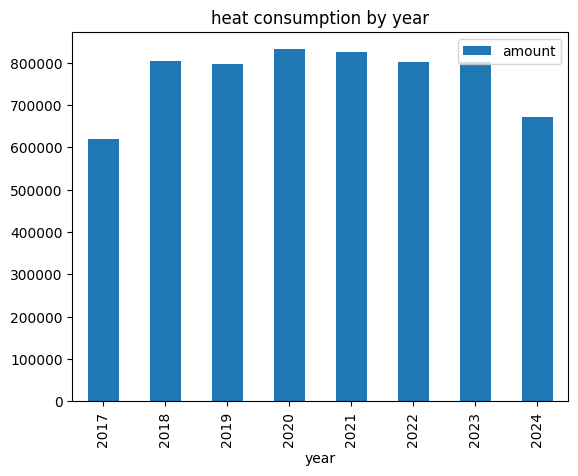

In [ ]:
reg_filt_wat.plot(kind="bar")
plt.title("water consumption by year")


Text(0.5, 1.0, 'Total number of rooms that have contracts')

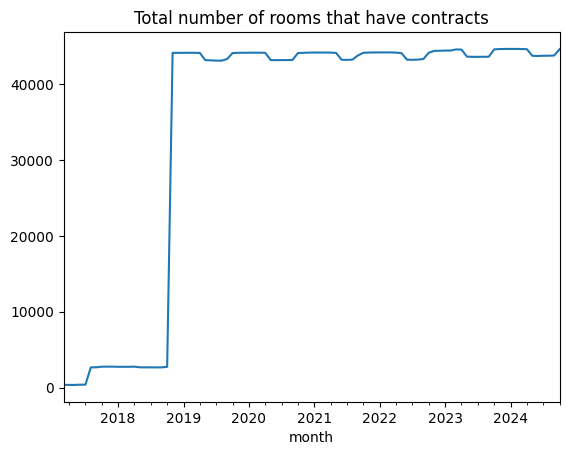

In [26]:
# how many rooms are contracted per month

grouped = register.groupby("month")["room_id"].nunique()
grouped.plot()
plt.title("Total number of rooms that have contracts (registered)")

In [6]:
new_register = register
new_register["year"] = new_register["month"].dt.year.astype(int)
grouped = new_register.groupby("year").size()
#grouped.to_csv("contract_trend_yearly.csv")

Text(0.5, 1.0, 'Total number of contracts')

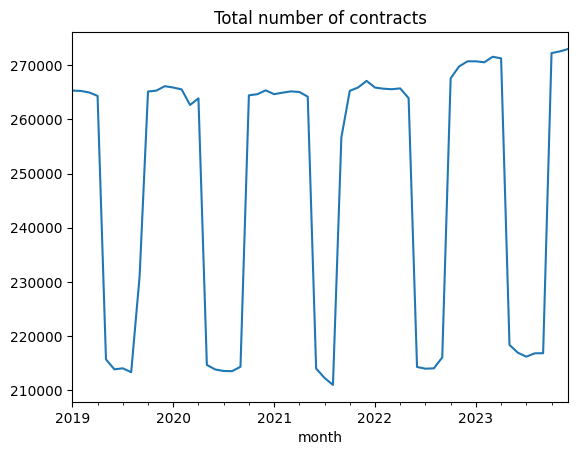

In [ ]:
grouped = register.groupby("month").size()
#grouped.to_csv("contract_trend.csv")
grouped.plot()
plt.title("Total number of contracts")

Text(0.5, 1.0, 'Total number of buildings that have contracts')

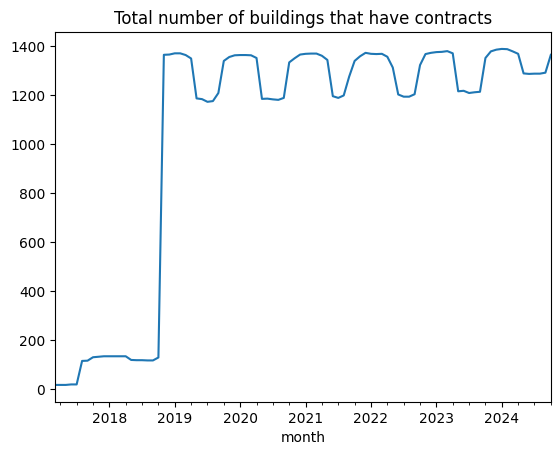

In [29]:
grouped = joined_df.groupby("month")["building_id"].nunique()
grouped.plot()
plt.title("Total number of buildings that have contracts")

### Energy consumed per building function

In [9]:
rooms["building_func"].value_counts()

building_func
Gyvenamasis (trijų ir daugiau butų - daugiaaukštis pastatas)    47079
Administracinė                                                    266
Mokslo                                                            119
Prekybos                                                           67
Gydymo                                                             48
Gyvenamasis (individualus pastatas)                                47
Kultūros                                                           24
Gamybos                                                            19
Sporto                                                             18
Kita                                                               14
Transporto                                                         11
Viešbučių                                                           5
Komercinės paskirties                                               5
Sandėliavimo                                                        5
Religi

From the value counts above I can only think that either the dataset is not complete, because there is only 47 room id for individual buildings?

In [ ]:


filtered_df = joined_df[joined_df["service_category"] == "Karštas vanduo"]
filtered_df["building_func"].fillna("Nezinoma", inplace=True)
filtered_df["year"] = filtered_df["month"].dt.year.astype(int)
pivot_df = filtered_df.pivot_table(values="amount", index="year", columns="building_func", aggfunc="sum", fill_value=0)
col_order = pivot_df.sum().sort_values(ascending=False).index
pivot_df = pivot_df[col_order]
pivot_df
#pivot_df.to_csv("wat_cons_by_func.csv")

C:\Users\zygim\AppData\Local\Temp\ipykernel_12424\2616459007.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_df["building_func"].fillna("Nezinoma", inplace=True)
C:\Users\zygim\AppData\Local\Temp\ipykernel_12424\2616459007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["building_func"].fillna("Nezinoma", inplace=T

<Axes: xlabel='year'>

<Figure size 1000x600 with 0 Axes>

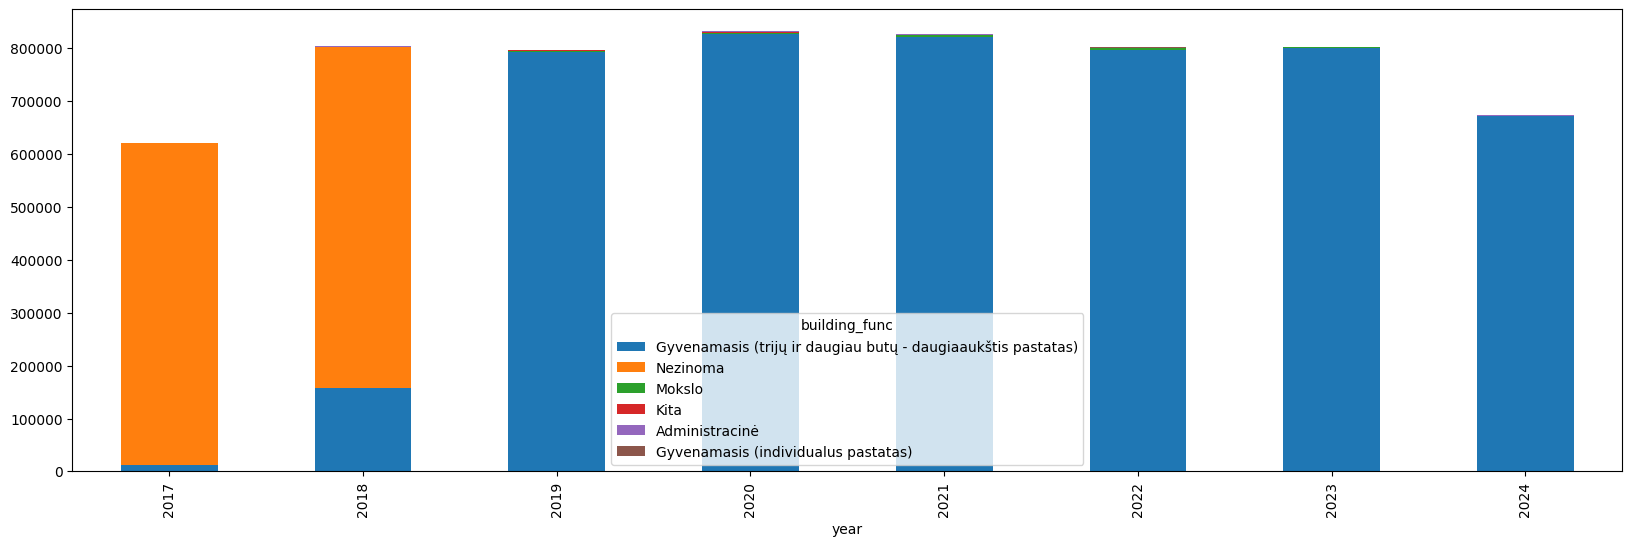

In [39]:
plt.figure(figsize=(10, 6))
pivot_df.plot(kind="bar", stacked=True, legend=True, figsize=(20, 6))


<Axes: xlabel='year'>

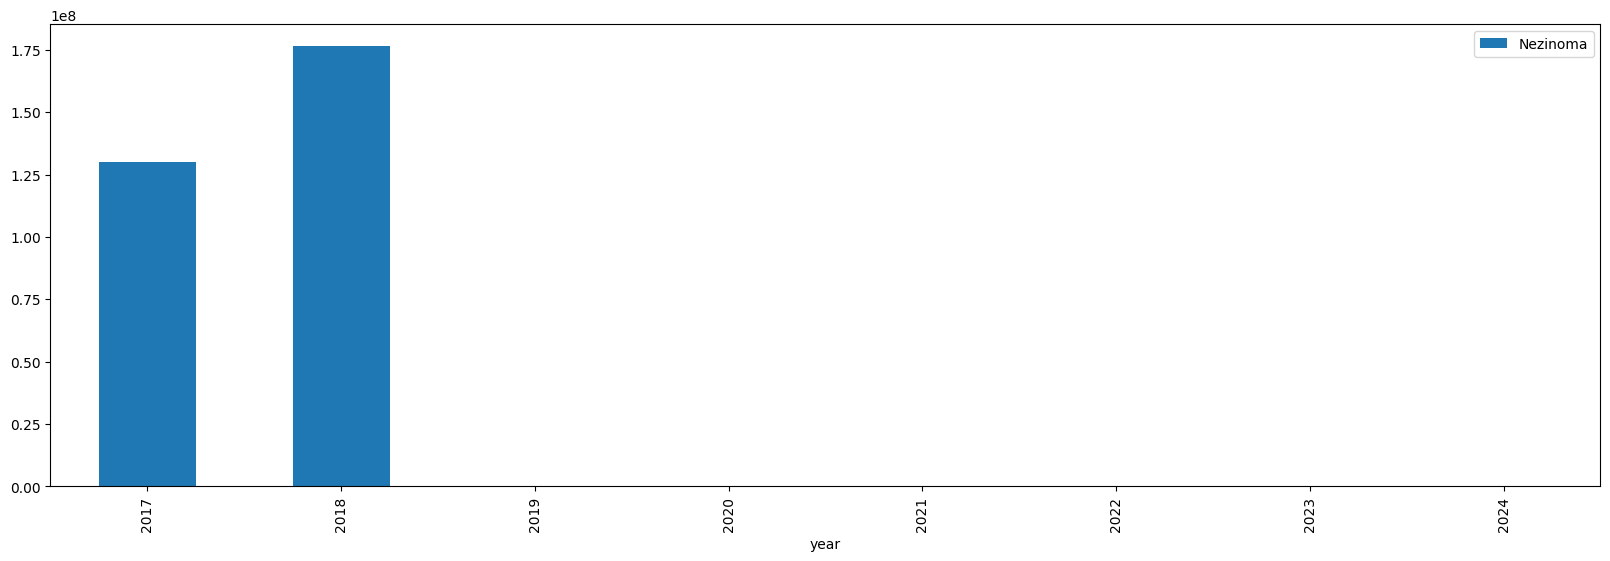

In [37]:
pivot_df["Nezinoma"].plot(kind="bar", legend=True, figsize=(20, 6))


In [8]:
# avg rooms per buyer id

buyer_room_df = register.groupby("buyer_id")["room_id"].nunique()
buyer_room_df = buyer_room_df[buyer_room_df != 0]

In [10]:
buyer_room_df = buyer_room_df.sort_values(ascending=False).head(50)
buyer_room_df.to_csv("buyer_rooms.csv")
buyer_room_df

buyer_id
450afdfda068aa0    630
d63d13cf5c8f252    205
d39fb998724eb94     78
30e5567877c6263     47
7ba7ac85ee8ba1c     45
f401cfddff767f7     37
95c37810b5309ce     33
d7a1278f09be5e8     31
fea7a8dbfcd51e5     26
5fb3d17954838b2     26
42c7d838c91dd9e     26
fe42721de77106c     20
a50e56668bc91c8     20
dca1971e3be2f7c     15
72d441ca0c574f5     14
e3694f57063826a     14
46f4708d23666fd     13
f575399b53a20a0     12
28b562ecacd0089     11
22218b895be665b     11
3a18c414b784056     11
c588767a9a0782c     11
6a0bdbc99dd62f5     10
dc2abf87bc904b0     10
b0c1e266a80cce0     10
ffbe7a01a899180     10
f3581f8b7ec8481     10
99327630ced45c6      9
12de6eca4a6734f      8
b5afb808886996f      8
b20688098ef5a78      8
a5e49f5e6d8cdd1      8
132e50f118c9553      8
90ad395b9b1ed7b      8
06e03558820317c      7
8af8c85bb1e8488      7
ace49af8efbdb51      7
bfefc608cf0620e      6
f1a528ab8ab54ca      6
5ce591d4a25b762      6
447278ea4922c10      6
645a79bf346a08d      6
86a5ffefa180731      6
22

<BarContainer object of 92256 artists>

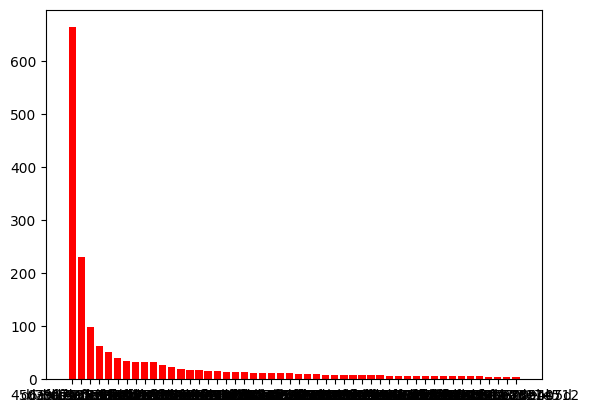

In [10]:
colors = ['green' if val == 'yes' else 'red' for val in buyer_room_df["legal_entity"]]
plt.bar(buyer_room_df["buyer_id"], buyer_room_df["room_id"], color=colors)

In [22]:
rooms["y_coord"].max() - rooms["y_coord"].min()

np.float64(0.5874351859650844)

In [26]:
# Geospatial
filtered_df = joined_df[joined_df["service_category"] == "Karštas vanduo"]
filtered_df = filtered_df[["month", "amount", "x_coord", "y_coord"]]
filtered_df.dropna(inplace=True)

grid_size = 0.0001

# Create new columns for the grid coordinates
filtered_df['x_grid'] = (filtered_df['x_coord'] // grid_size) * grid_size
filtered_df['y_grid'] = (filtered_df['y_coord'] // grid_size) * grid_size

# Group by the grid coordinates and sum the amounts
aggregated_df = filtered_df.groupby(["month", 'x_grid', 'y_grid']).agg({'amount': 'sum'}).reset_index()
aggregated_df
#aggregated_df.to_csv("geo_amount_wat.csv", index=False)

In [ ]:
# geospatial building age data
builds = rooms.groupby("building_id").first()[["build_year", "x_coord", "y_coord"]].reset_index(drop=True)
builds.dropna(inplace=True)
builds["build_year"] = builds["build_year"].dt.year.astype(int)
#builds.to_csv("geo_build.csv", index=False)
builds.head()

,build_year,x_coord,y_coord
0,1981,23.303358,55.934346
1,1984,22.951034,55.987235
2,1937,23.315403,55.932877
3,2007,23.309599,55.928946
4,1900,23.274152,55.906005


In [37]:
# geospatial building floor data
builds = rooms.groupby("building_id").first()[["building_floors", "x_coord", "y_coord"]].reset_index(drop=True)
builds.dropna(inplace=True)
#builds.to_csv("geo_floors.csv", index=False)
builds.head()

,building_floors,x_coord,y_coord
0,5.0,23.303358,55.934346
1,5.0,22.951034,55.987235
2,3.0,23.315403,55.932877
3,13.0,23.309599,55.928946
4,1.0,23.274152,55.906005


(1940.0, 2031.7)

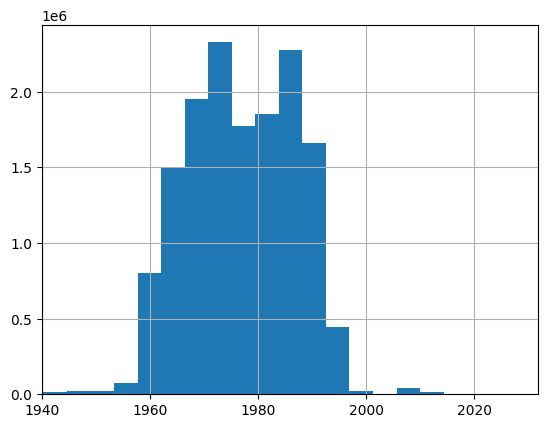

In [46]:
years = joined_df["build_year"]
years = years.dt.year
years.hist(bins=40)
plt.xlim(1940)
years

In [58]:
filtered_df = joined_df[joined_df["service_category"] == "Šiluma"]
filtered_df = filtered_df.groupby(["room_id", "month"])["amount"].sum().reset_index()
filtered_df = filtered_df.groupby("room_id")["amount"].mean().reset_index()

In [90]:
merged_df = pd.merge(filtered_df, rooms[["room_id", "room_area", "build_year", "building_func"]], on="room_id", how="left")
merged_df = merged_df[merged_df["room_area"] > 1]
merged_df["eff"] = merged_df["amount"] / merged_df["room_area"]
merged_df["build_year"] = merged_df["build_year"].dt.year
merged_df

,room_id,amount,room_area,build_year,building_func,eff
0,0000f5a306aa85a,605.036263,50.10,1987.0,Gyvenamasis (trijų ir daugiau butų - daugiaauk...,12.076572
1,0003b5d9f0dca41,630.674410,45.85,1966.0,Gyvenamasis (trijų ir daugiau butų - daugiaauk...,13.755167
2,00044f4c89baa63,339.886952,17.78,1973.0,Gyvenamasis (trijų ir daugiau butų - daugiaauk...,19.116251
3,0005b1cb5c56b3f,678.452598,36.24,1982.0,Gyvenamasis (trijų ir daugiau butų - daugiaauk...,18.721098
4,0006d206de1f4df,180.783825,18.70,1972.0,Gyvenamasis (trijų ir daugiau butų - daugiaauk...,9.667584
...,...,...,...,...,...,...
44783,fffa5db39533088,414.902242,36.13,1983.0,Gyvenamasis (trijų ir daugiau butų - daugiaauk...,11.483594
44784,fffb874c4de8366,828.145257,65.54,1985.0,Gyvenamasis (trijų ir daugiau butų - daugiaauk...,12.635723
44785,fffbb9a4a3e62b7,602.928743,50.62,1981.0,Gyvenamasis (trijų ir daugiau butų - daugiaauk...,11.910880
44786,fffdcb94cc425f1,334.863175,43.12,1962.0,Gyvenamasis (trijų ir daugiau butų - daugiaauk...,7.765844


In [127]:
area_df = merged_df[merged_df["room_area"] < 120]
area_df = area_df[["room_area", "eff"]].sort_values(by="room_area")
area_df["area_bins"] = pd.cut(area_df["room_area"], bins=[0, 20, 40, 60, 80, 100, 120], labels=["0-20", "21-40", "41-60", "61-80", "81-100", "101-120"])
area_df = area_df.groupby("area_bins")["eff"].mean().reset_index()
#area_df.to_csv("area_df.csv")

C:\Users\zygim\AppData\Local\Temp\ipykernel_6720\2623097609.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  area_df = area_df.groupby("area_bins")["eff"].mean().reset_index()


<Axes: >

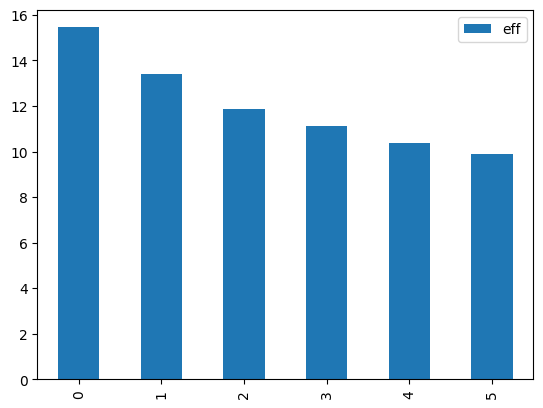

In [126]:
area_df.plot(kind="bar")

In [ ]:
func_df = merged_df.groupby("building_func")["eff"].mean().sort_values(ascending=False)
#func_df.to_csv("func_df.csv")
func_df

building_func
Transporto                                                      33.110741
Maitinimo                                                       25.217854
Gyvenamasis (individualus pastatas)                             15.905181
Gydymo                                                          14.783526
Religinės                                                       14.659288
Kita                                                            14.629483
Administracinė                                                  14.029821
Kultūros                                                        13.566917
Gamybos                                                         12.710442
Gyvenamasis (trijų ir daugiau butų - daugiaaukštis pastatas)    12.140934
Prekybos                                                        12.119175
Sporto                                                          11.860695
Komercinės paskirties                                            9.288435
Mokslo                  

Buildings are limited from 1900 to 2019 because the sample size is way too small to get an accurate average heat consumption

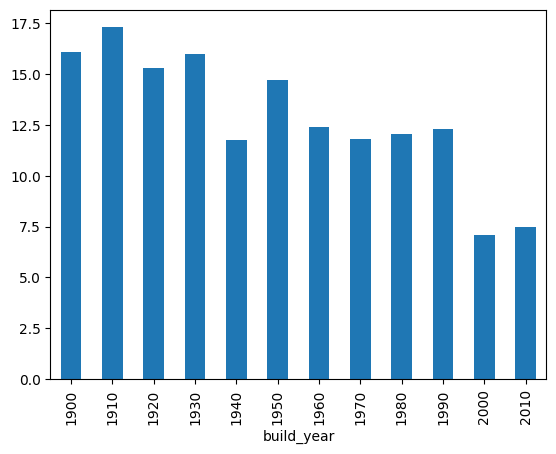

In [89]:
grouped_df = merged_df
grouped_df = grouped_df[grouped_df["build_year"] >= 1900]
grouped_df = grouped_df[grouped_df["build_year"] <= 2019]
grouped_df["build_year"] = grouped_df["build_year"] // 10 * 10
grouped_df["build_year"] = grouped_df["build_year"].astype("Int64")
grouped_df = grouped_df.groupby("build_year")["eff"].mean()
grouped_df.plot(kind="bar")
#grouped_df.to_csv("heat_by_build_year.csv")

In [12]:
# Obviously a room can't have an area of 0 so I'm removing those

new_rooms = rooms[rooms["room_area"] != 0]["room_area"]
new_rooms.describe()[1:]

mean       72.479710
std       473.293482
min         0.430000
25%        37.960000
50%        49.610000
75%        57.852500
max     40760.330000
Name: room_area, dtype: float64

Sarima

In [23]:
register.head()

,room_id,month,amount,unit,buyer_id,legal_entity,service_name,service_category
1,8a7c29f8e37976a,2023-03-01,1.0000,m³,8272553dc51db2a,False,Karštas vanduo,Karštas vanduo
4,bcb1927d761f747,2020-11-01,57.3542,kWh,29abb8cfb442094,False,Šiluma,Šiluma
5,bee2b9a2b530c27,2020-10-01,1.0000,vnt,1eedc57f7ac5574,False,K.v. skaitiklio aptarnavimas,K.v. skaitiklio aptarnavimas
7,9d13720752b2ca0,2023-01-01,2.2437,kWh,c636ca19ceb560a,False,Nepaskirstyto vandens šilumos kiekis,Šiluma
10,e104b13fdb2f464,2023-10-01,1.0000,vnt,b3dbc2b1850ca82,False,K.v. skaitiklio aptarnavimas,K.v. skaitiklio aptarnavimas


In [37]:
sar_filter_df = register[register["service_category"] == "Šiluma"]
sarima_df = pd.DataFrame(sar_filter_df.groupby("month")["amount"].sum(), columns=["amount"])
sarima_df.tail()

,amount
month,
2024-06-01,7.901562e+06
2024-07-01,8.117238e+06
2024-08-01,7.841925e+06
2024-09-01,8.393852e+06
2024-10-01,2.710681e+07


In [38]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(sarima_df['amount'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.4331598355206348
p-value: 0.5662797301429898


In [39]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the model
order = (1, 1, 1)  # Non-seasonal: AR(1), diff(1), MA(1)
seasonal_order = (1, 1, 1, 12)  # Seasonal: AR(1), diff(1), MA(1), period=12
model = SARIMAX(sarima_df['amount'], order=order, seasonal_order=seasonal_order, enforce_stationarity=True, enforce_invertibility=True)

# Fit the model
results = model.fit()
print(results.summary())

z:\projects\python\personal\siluma\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
z:\projects\python\personal\siluma\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
z:\projects\python\personal\siluma\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                     SARIMAX Results                                      
Dep. Variable:                             amount   No. Observations:                   70
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -968.980
Date:                            Wed, 26 Feb 2025   AIC                           1947.959
Time:                                    08:46:24   BIC                           1958.175
Sample:                                01-01-2019   HQIC                          1951.929
                                     - 10-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1631      0.257      0.636      0.525      -0.340       0.666
ma.L1         -0.5572      0.301   

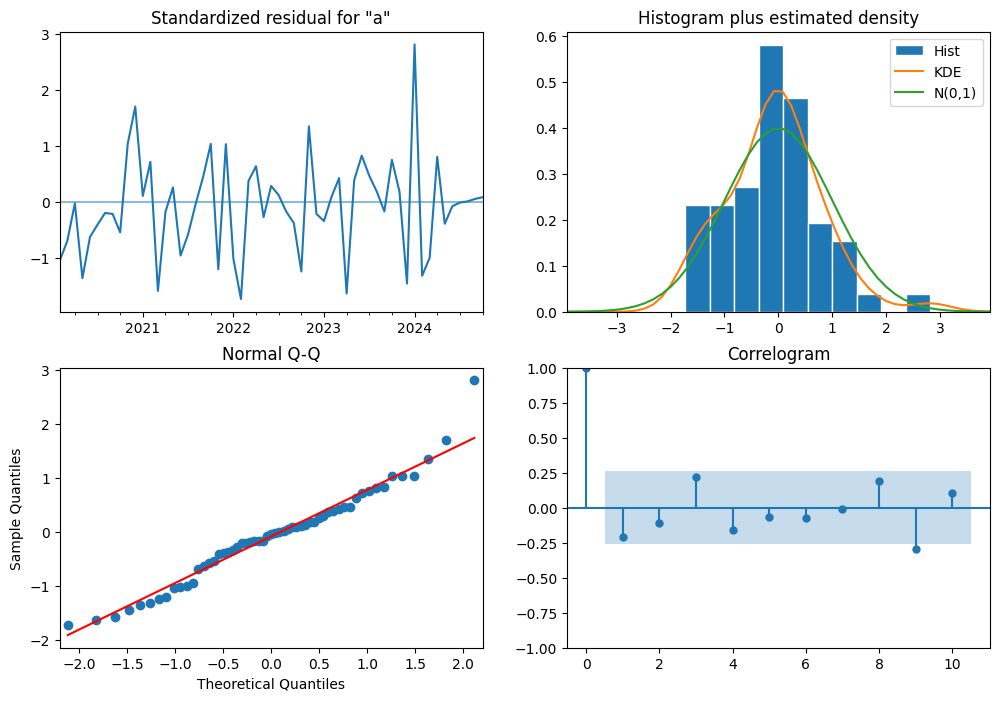

In [40]:
# Plot diagnostics
results.plot_diagnostics(figsize=(12, 8))
plt.show()

C:\Users\zygim\AppData\Local\Temp\ipykernel_20268\3794012739.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=sarima_df.index[-1], periods=37, freq='M')[1:]


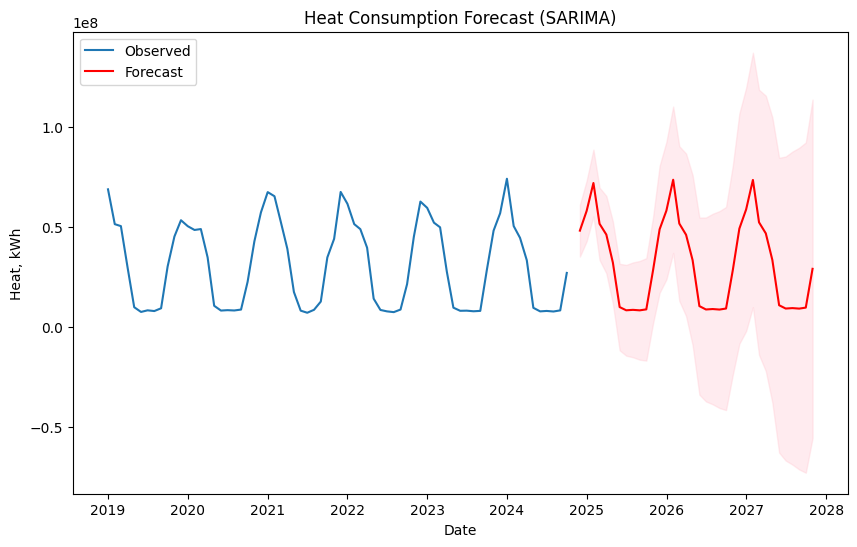

<Figure size 640x480 with 0 Axes>

In [ ]:
# Forecast 12 months ahead
forecast = results.get_forecast(steps=36)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Create future dates
future_dates = pd.date_range(start=sarima_df.index[-1], periods=37, freq='M')[1:]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(sarima_df['amount'], label='Observed')
plt.plot(future_dates, forecast_mean, label='Forecast', color='red')
plt.fill_between(future_dates, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Heat Consumption Forecast (SARIMA)')
plt.xlabel('Date')
plt.ylabel('Heat, kWh')
plt.legend()
plt.show()
# Print forecast values
forecast_df = pd.DataFrame({'Forecast': forecast_mean}, index=future_dates)


In [42]:
import itertools

p = d = q = P = D = Q = [0, 1]
s = 12
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], s) for x in pdq]

best_aic = float('inf')
best_params = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(sarima_df['amount'], order=param, seasonal_order=param_seasonal)
            res = mod.fit(disp=False)
            if res.aic < best_aic:
                best_aic = res.aic
                best_params = (param, param_seasonal)
        except:
            continue

print(f'Best AIC: {best_aic}, Best Params: {best_params}')

z:\projects\python\personal\siluma\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
z:\projects\python\personal\siluma\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
z:\projects\python\personal\siluma\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
z:\projects\python\personal\siluma\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
z:\projects\python\personal\siluma\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: 

Best AIC: 1945.5358025988319, Best Params: ((0, 1, 1), (1, 1, 0, 12))
